# Advanced RAG Eval

The cookbook walks through the process of running eval(s) on advanced RAG.

This can be very useful to determine the best RAG approach for your application.

In [1]:
! pip install -U langchain openai langchain_chroma langchain-experimental # (newest versions required for multi-modal)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.1 MB/s eta 0:

In [ ]:
! pip install "unstructured[all-docs]==0.10.19" pillow pydantic lxml matplotlib tiktoken open_clip_torch torch

In [4]:
# lock to 0.10.19 due to a persistent bug in more recent versions
! pip install pillow pydantic lxml matplotlib tiktoken open_clip_torch torch

## Data Loading

Let's look at an [example whitepaper](https://sgp.fas.org/crs/misc/IF10244.pdf) that provides a mixture of tables, text, and images about Wildfires in the US.

### Option 1: Load text

In [2]:
!pip install --upgrade "unstructured[all-docs]" onnxruntime==1.16.0 pillow pydantic lxml matplotlib tiktoken open_clip_torch torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of unstructured[all-docs] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of unstructured[all-docs] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of unstructured-inference to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of unstructured-inference

In [6]:
!pip install pypdf

In [7]:
# 测试1
# Path
path = "/content/aaa.pdf"

# Load
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(path)
pdf_pages = loader.load()

# Split
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
all_splits_pypdf = text_splitter.split_documents(pdf_pages)
all_splits_pypdf_texts = [d.page_content for d in all_splits_pypdf]

### Option 2: Load text, tables, images



In [1]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [2]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (321 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.8_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.8) ...
Setting up poppler-utils (22.02.0-2ubuntu0.8) ...
Processing triggers for man-db (2.10.2-1) ...


In [1]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [3]:
import os
target_dir = '/root/.cache/huggingface/hub/yolox_quantized'
os.makedirs(target_dir, exist_ok=True)

In [7]:
!pip install unstructured_inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [1]:
# 测试2
from unstructured.partition.pdf import partition_pdf
path = "/content/aaa.pdf"
# Extract images, tables, and chunk text
raw_pdf_elements = partition_pdf(
    filename=path,
    extract_images_in_pdf=False,   # 不提取PDF中的图片
    infer_table_structure=True,    # 启用表格结构识别
    chunking_strategy="by_title",  # 按标题分块策略
    max_characters=4000,          # 每个文本块最大字符数
    new_after_n_chars=3800,       # 达到3800字符后分新块
    combine_text_under_n_chars=2000, # 合并小于2000字符的碎片文本
    image_output_dir_path=path,   # 图片输出目录（本例未使用）
)

# Categorize by type
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
# 测试3
from unstructured.partition.pdf import partition_pdf
import os

# 确保 Tesseract OCR 配置正确
# os.environ["TESSDATA_PREFIX"] = r"/opt/homebrew/Cellar/tesseract/5.5.1/share/tessdata"
# os.environ["http_proxy"] = "http://127.0.0.1:7890"
# os.environ["https_proxy"] = "http://127.0.0.1:7890"

elements = partition_pdf(
    filename="/content/2020-03-17__厦门灿坤实业股份有限公司__200512__闽灿坤__2019年__年度报告.pdf",
    extract_images_in_pdf=False,   # 不提取PDF中的图片
    infer_table_structure=True,    # 启用表格结构识别
    chunking_strategy="by_title",  # 按标题分块策略
    max_characters=4000,          # 每个文本块最大字符数
    new_after_n_chars=3800,       # 达到3800字符后分新块
    combine_text_under_n_chars=2000, # 合并小于2000字符的碎片文本
    image_output_dir_path="./",   # 图片输出目录（本例未使用）
    languages=["chi_sim"]
)

# 打印所有提取的元素（调试用）
for i, element in enumerate(elements):
    print(f"元素 {i + 1}: {element}")

# 检查是否有表格
tables = [el for el in elements if hasattr(el, 'metadata') and hasattr(el.metadata, 'text_as_html')]
for i, table in enumerate(tables):
    print(f"表格 {i + 1}:")
    print(table.metadata.text_as_html)  # 输出 HTML 格式的表格

# 统计元素类型
category_counts = {}
for element in elements:
    category = str(type(element))
    category_counts[category] = category_counts.get(category, 0) + 1
print(category_counts)


元素 1: 厦门灿坤实业股份有限公司 2019 年年度报告全文

履 门 灿 坤 实 业 股 份 有 限 公 司 2019 年 年 度 报 告

2020 年 03 月

11

www.cninfo.com.cr

厦门灿坤实业股份有限公司 2019 年年度报告全文

第一节 重要提示、目录和释义

公 司 董 事 会 、 监 事 会 及 董 事 、 监 事 、 高 级 管 理 人 员 保 证 年 度 报 告 内 容 的 真 实 、 准 确 、 完 整 , 不 存 在 虚 假 记 载 、 误 导 性 陈 述 或 重 大 遗 漪 , 并 承 担 个 别 和 连 带 的 法 律 责 任 。

所有董事均已出席了审议本报告的董事会会议。

公 司 经 本 次 董 事 会 审 议 通 过 的 利 润 分 配 预 案 为 , 以 185,391,680 为 基 数 , 向 全 体 股 东 每 10 股 派 发 现 金 红 利 1 元 ( 含 税 ), 不 送 红 股 , 不 以 公 积 金 转 增 股 本 。

公 司 负 责 人 潘 志 荣 、 主 管 会 计 工 作 负 责 人 吴 建 华 及 会 计 机 构 负 责 人 ( 会 计 主 管 人 员 ) 吴 建 华 声 明 , 保 证 年 度 报 告 中 财 务 报 告 的 真 实 、 准 确 、 完 整 。

本 年 度 报 告 涉 及 未 来 计 划 等 前 眯 性 陈 述 , 不 构 成 公 司 对 投 资 者 的 实 质 承 诺 , 请 投 资 者 注 意 投 资 风 险 。

12

www.cninfo.com.cl

厦门灿坤实业股份有限公司 2019 年年度报告全文

目录

第一节 重要提示、目录和释义.................................................................................. 2
元素 2: 第 一 节 重 要 提 示 、 目 录 和 释 义 …..........444400。 2 第 二 节 公 司 简 介 和 主 要 财 务 指 标 …...............44400e 5 第 三 节 公 司 业 务 概 要 …........00 8 第 四 节 经 营 情 况 讨 论 与 分 析 ….......

In [18]:
# 测试3
from unstructured.partition.pdf import partition_pdf
import os

# 确保 Tesseract OCR 配置正确
# os.environ["TESSDATA_PREFIX"] = r"/opt/homebrew/Cellar/tesseract/5.5.1/share/tessdata"
# os.environ["http_proxy"] = "http://127.0.0.1:7890"
# os.environ["https_proxy"] = "http://127.0.0.1:7890"
path = "/content/aaa.pdf"
elements = partition_pdf(
    filename=path,
    extract_images_in_pdf=False,
    infer_table_structure=True,
    # 移除冲突的分块参数
    chunking_strategy=None,                # 禁用自动分块
    max_characters=None,                  # 取消字符限制
    new_after_n_chars=None,               # 取消分块阈值
    combine_text_under_n_chars=None,       # 取消文本合并
    # 增强表格识别
    strategy="hi_res",                    # 必须使用高精度模式
    table_extraction_mode="text_and_table", # 独立处理表格
    # 修复模型加载问题
    # model_name="table-transformer-detection",  # 显式指定模型
    # hi_res_model_name="yolox",
    # 语言优化
    languages=["chi_sim"]                 # 明确中文处理
)

# 打印所有提取的元素（调试用）
for i, element in enumerate(elements):
    print(f"元素 {i + 1}: {element}")

# 检查是否有表格
tables = [el for el in elements if hasattr(el, 'metadata') and hasattr(el.metadata, 'text_as_html')]
for i, table in enumerate(tables):
    print(f"表格 {i + 1}:")
    print(table.metadata.text_as_html)  # 输出 HTML 格式的表格

# 统计元素类型
category_counts = {}
for element in elements:
    category = str(type(element))
    category_counts[category] = category_counts.get(category, 0) + 1
print(category_counts)


元素 1: 厦门灿坤实业股份有限公司 2019 年年度报告全文
元素 2: 目录
元素 3: 第一节 重要提示、目录和释义.................................................................................. 2
元素 4: 第 一 节 重 要 提 示 、 目 录 和 释 义 …..........440400。 2 第 二 节 公 司 简 介 和 主 要 财 务 指 标 …..............440000e 5 第 三 节 公 司 业 务 概 要 ….....40 8 第 四 节 经 营 情 况 讨 论 与 分 析 …..............44000ee 10 第 五 节 重 要 事 项 …..........00 23 第 六 节 股 份 变 动 及 股 东 情 况 …..........44000 38 第 七 节 优 先 股 相 关 情 况 ….............4000e 41 第 八 节 董 事 、 监 事 、 高 级 管 理 人 员 和 员 工 情 况 …..................00.4eeeeeeeee。 41 第 九 节 公 司 治 理 … 48 第 十 节 公 司 债 券 相 关 情 况 ….............40000 53 第 十 一 节 财 务 报 告 … 53 第 十 二 节 备 查 文 件 目 录 … 54
元素 5: 第二节 公司简介和主要财务指标.............................................................................. 5
元素 6: 第三节 公司业务概要.................................................................................................. 8
元素 7: 第四节 经营情况讨论与分析.................................................................................... 10
元素 8: 第五节 重要事项........................

In [ ]:
len(tables)

'AZAD LS TS 91350200612002170L ZAI ET WORE AMS HAR CTE [TEAR BE iP WBC AR IR BE HL KEG'

## Store

### Option 1: Embed, store text chunks

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

baseline = Chroma.from_texts(
    texts=all_splits_pypdf_texts,
    collection_name="baseline",
    embedding=OpenAIEmbeddings(),
)
retriever_baseline = baseline.as_retriever()

### Option 2: Multi-vector retriever

#### Text Summary

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# Prompt
prompt_text = """You are an assistant tasked with summarizing tables and text for retrieval. \
These summaries will be embedded and used to retrieve the raw text or table elements. \
Give a concise summary of the table or text that is well optimized for retrieval. Table or text: {element} """
prompt = ChatPromptTemplate.from_template(prompt_text)

# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

# Apply to text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 5})

# Apply to tables
table_summaries = summarize_chain.batch(tables, {"max_concurrency": 5})

#### Image Summary

In [ ]:
# Image summary chain
import base64
import io
import os
from io import BytesIO

from langchain_core.messages import HumanMessage
from PIL import Image


def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
    """Image summary"""
    chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


# Store base64 encoded images
img_base64_list = []

# Store image summaries
image_summaries = []

# Prompt
prompt = """You are an assistant tasked with summarizing images for retrieval. \
These summaries will be embedded and used to retrieve the raw image. \
Give a concise summary of the image that is well optimized for retrieval."""

# Apply to images
for img_file in sorted(os.listdir(path)):
    if img_file.endswith(".jpg"):
        img_path = os.path.join(path, img_file)
        base64_image = encode_image(img_path)
        img_base64_list.append(base64_image)
        image_summaries.append(image_summarize(base64_image, prompt))

### Option 2a: Multi-vector retriever w/ raw images

* Return images to LLM for answer synthesis

In [ ]:
import uuid
from base64 import b64decode

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_core.documents import Document


def create_multi_vector_retriever(
    vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):
    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever


# The vectorstore to use to index the summaries
multi_vector_img = Chroma(
    collection_name="multi_vector_img", embedding_function=OpenAIEmbeddings()
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    multi_vector_img,
    text_summaries,
    texts,
    table_summaries,
    tables,
    image_summaries,
    img_base64_list,
)

In [ ]:
# Testing on retrieval
query = "What percentage of CPI is dedicated to Housing, and how does it compare to the combined percentage of Medical Care, Apparel, and Other Goods and Services?"
suffix_for_images = " Include any pie charts, graphs, or tables."
docs = retriever_multi_vector_img.invoke(query + suffix_for_images)


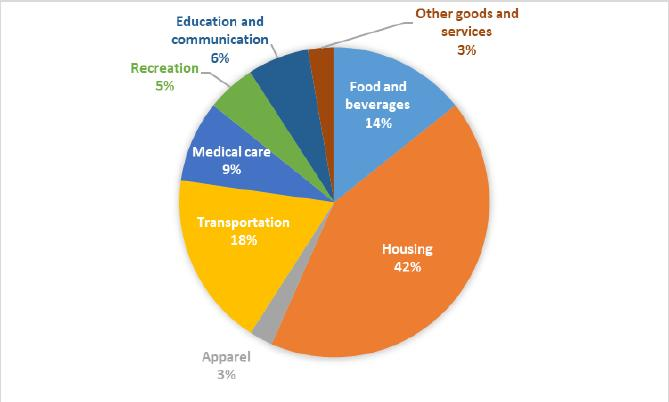

In [ ]:
from IPython.display import HTML, display


def plt_img_base64(img_base64):
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'

    # Display the image by rendering the HTML
    display(HTML(image_html))


plt_img_base64(docs[1])

### Option 2b: Multi-vector retriever w/ image summaries

* Return text summary of images to LLM for answer synthesis

In [ ]:
# The vectorstore to use to index the summaries
multi_vector_text = Chroma(
    collection_name="multi_vector_text", embedding_function=OpenAIEmbeddings()
)

# Create retriever
retriever_multi_vector_img_summary = create_multi_vector_retriever(
    multi_vector_text,
    text_summaries,
    texts,
    table_summaries,
    tables,
    image_summaries,
    img_base64_list,
)

### Option 3: Multi-modal embeddings

In [ ]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings

# Create chroma w/ multi-modal embeddings
multimodal_embd = Chroma(
    collection_name="multimodal_embd", embedding_function=OpenCLIPEmbeddings()
)

# Get image URIs
image_uris = sorted(
    [
        os.path.join(path, image_name)
        for image_name in os.listdir(path)
        if image_name.endswith(".jpg")
    ]
)

# Add images and documents
if image_uris:
    multimodal_embd.add_images(uris=image_uris)
if texts:
    multimodal_embd.add_texts(texts=texts)
if tables:
    multimodal_embd.add_texts(texts=tables)

# Make retriever
retriever_multimodal_embd = multimodal_embd.as_retriever()

## RAG

### Text Pipeline

In [ ]:
from operator import itemgetter

from langchain_core.runnables import RunnablePassthrough

# Prompt
template = """Answer the question based only on the following context, which can include text and tables:
{context}
Question: {question}
"""
rag_prompt_text = ChatPromptTemplate.from_template(template)


# Build
def text_rag_chain(retriever):
    """RAG chain"""

    # LLM
    model = ChatOpenAI(temperature=0, model="gpt-4")

    # RAG pipeline
    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | rag_prompt_text
        | model
        | StrOutputParser()
    )

    return chain

### Multi-modal Pipeline

In [ ]:
import re

from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda


def looks_like_base64(sb):
    """Check if the string looks like base64."""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
    """Check if the base64 data is an image by looking at the start of the data."""
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def split_image_text_types(docs):
    """Split base64-encoded images and texts."""
    b64_images = []
    texts = []
    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}


def img_prompt_func(data_dict):
    # Joining the context texts into a single string
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        image_message = {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{data_dict['context']['images'][0]}"
            },
        }
        messages.append(image_message)

    # Adding the text message for analysis
    text_message = {
        "type": "text",
        "text": (
            "Answer the question based only on the provided context, which can include text, tables, and image(s). "
            "If an image is provided, analyze it carefully to help answer the question.\n"
            f"User-provided question / keywords: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


def multi_modal_rag_chain(retriever):
    """Multi-modal RAG chain"""

    # Multi-modal LLM
    model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1024)

    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

### Build RAG Pipelines

In [ ]:
# RAG chains
chain_baseline = text_rag_chain(retriever_baseline)
chain_mv_text = text_rag_chain(retriever_multi_vector_img_summary)

# Multi-modal RAG chains
chain_multimodal_mv_img = multi_modal_rag_chain(retriever_multi_vector_img)
chain_multimodal_embd = multi_modal_rag_chain(retriever_multimodal_embd)

## Eval set

In [ ]:
# Read
import pandas as pd

eval_set = pd.read_csv(path + "cpi_eval.csv")
eval_set.head(3)

,Question,Answer,Source
0,What percentage of CPI is dedicated to Housing?,Housing occupies 42% of CPI.,Figure 1
1,Medical Care and Transportation account for wh...,Transportation accounts for 18% of CPI. Medica...,Figure 1
2,Based on the CPI Owners' Equivalent Rent and t...,The FHFA Purchase Only Price Index appears to ...,Figure 2


In [ ]:
from langsmith import Client

# Dataset
client = Client()
dataset_name = f"CPI Eval {str(uuid.uuid4())}"
dataset = client.create_dataset(dataset_name=dataset_name)

# Populate dataset
for _, row in eval_set.iterrows():
    # Get Q, A
    q = row["Question"]
    a = row["Answer"]
    # Use the values in your function
    client.create_example(
        inputs={"question": q}, outputs={"answer": a}, dataset_id=dataset.id
    )

In [ ]:
from langchain.smith import RunEvalConfig

eval_config = RunEvalConfig(
    evaluators=["qa"],
)


def run_eval(chain, run_name, dataset_name):
    _ = client.run_on_dataset(
        dataset_name=dataset_name,
        llm_or_chain_factory=lambda: (lambda x: x["question"] + suffix_for_images)
        | chain,
        evaluation=eval_config,
        project_name=run_name,
    )


for chain, run in zip(
    [chain_baseline, chain_mv_text, chain_multimodal_mv_img, chain_multimodal_embd],
    ["baseline", "mv_text", "mv_img", "mm_embd"],
):
    run_eval(chain, dataset_name + "-" + run, dataset_name)

View the evaluation results for project 'CPI Eval 9648e7fe-5ae2-469f-8701-33c63212d126-baseline' at:
https://smith.langchain.com/o/1fa8b1f4-fcb9-4072-9aa9-983e35ad61b8/projects/p/533846be-d907-4d9c-82db-ce2f1a18fdbf?eval=true

View all tests for Dataset CPI Eval 9648e7fe-5ae2-469f-8701-33c63212d126 at:
https://smith.langchain.com/datasets/d1762232-5e01-40e7-9978-63002a4c95a3
[------------------------------------------------->] 4/4View the evaluation results for project 'CPI Eval 9648e7fe-5ae2-469f-8701-33c63212d126-mv_text' at:
https://smith.langchain.com/o/1fa8b1f4-fcb9-4072-9aa9-983e35ad61b8/projects/p/f5caeede-6f8e-46f7-b4f2-9f23daa31eda?eval=true

View all tests for Dataset CPI Eval 9648e7fe-5ae2-469f-8701-33c63212d126 at:
https://smith.langchain.com/datasets/d1762232-5e01-40e7-9978-63002a4c95a3
[------------------------------------------------->] 4/4View the evaluation results for project 'CPI Eval 9648e7fe-5ae2-469f-8701-33c63212d126-mv_img' at:
https://smith.langchain.com/o/1fa8

In [2]:
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.5
    Uninstalling huggingface-hub-0.33.5:
      Successfully uninstalled huggingface-hub-0.33.5


In [3]:
!pip uninstall -y numpy unstructured-inference onnxruntime
!pip install numpy==1.26.4 unstructured-inference==0.6.6 onnxruntime==1.16.0

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: unstructured-inference 0.6.6
Uninstalling unstructured-inference-0.6.6:
  Successfully uninstalled unstructured-inference-0.6.6
Found existing installation: onnxruntime 1.16.0
Uninstalling onnxruntime-1.16.0:
  Successfully uninstalled onnxruntime-1.16.0
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached unstructured_inference-0.6.6-py3-none-any.whl.metadata (6.6 kB)
  Using cached onnxruntime-1.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached unstructured_inference-0.6.6-py3-none-any.whl (60 kB)
Using cached onnxruntime-1.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.2 MB)
ERROR: pip's dependency resolver does not currently

In [5]:
!apt-get update
!apt-get install -y tesseract-ocr tesseract-ocr-chi-sim

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,152 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,160 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Package